# ML Data Wrangling

## Dependencies

In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

# Import the dependencies.
# OpenCV
import cv2

# TensorFlow and tf.keras
# https://www.tensorflow.org/api_docs/python/tf/keras
import tensorflow as tf

# Helper libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Import the dependencies.
import pandas as pd
from pathlib import Path
import time

## Digital Image

An image is nothing more than a two-dimensional array of numbers(or pixels) ranging between 0 and 255. It is defined by the mathematical function f(x,y) where x and y are the two co-ordinates horizontally and vertically.

Image Pre-processing:

 - Read image
 - Remove noise
 - Resize Image (standardizing the inputs aka normalization)
 - Morphology (smoothing edges if needed)
 - Augmentation
 - Segmenatation
  - Feature Analysis
  - Classification

## Reading Images

In [2]:
# I want to walk through all the images in our dataset and gether information on them.
# I really need to figure out how to grab the image demensions

with_mask = Path("../data/processed/train/with_mask")
all_files = []
for i in with_mask.rglob('*.*'):
    all_files.append((i.parent, i.name, i.stat().st_size, time.ctime(i.stat().st_ctime)))

columns = ["Parent", "File_Name", "File_Size", "Created"]
with_mask_df = pd.DataFrame.from_records(all_files, columns=columns)

with_mask_df.head()

,Parent,File_Name,File_Size,Created
0,..\data\processed\train\with_mask,-110603108-gettyimages-533567012.jpg,9910,Tue Apr 14 11:49:48 2020
1,..\data\processed\train\with_mask,-110695084-mask2.jpg,70153,Tue Apr 14 11:49:48 2020
2,..\data\processed\train\with_mask,0-with-mask.jpg,28755,Tue Apr 14 11:49:48 2020
3,..\data\processed\train\with_mask,0000305-62360-halyard-health-pfr-p3-respirator...,10207,Tue Apr 14 11:49:48 2020
4,..\data\processed\train\with_mask,0000444-48296-halyard-health-surgical-mask-ted...,184277,Tue Apr 14 11:49:48 2020


In [3]:
# I want to walk through all the images in our dataset and gether information on them.

without_mask = Path("../data/processed/train/without_mask")
all_files = []
for i in without_mask.rglob('*.*'):
    all_files.append((i.parent, i.name, i.stat().st_size, time.ctime(i.stat().st_ctime)))

columns = ["Parent", "File_Name", "File_Size", "Created"]
without_mask_df = pd.DataFrame.from_records(all_files, columns=columns)

without_mask_df.head()

,Parent,File_Name,File_Size,Created
0,..\data\processed\train\without_mask,0.jpg,21764,Mon Jan 18 16:13:11 2021
1,..\data\processed\train\without_mask,0_0_aidai_0014.jpg,6318,Mon Jan 18 16:13:11 2021
2,..\data\processed\train\without_mask,0_0_aidai_0029.jpg,7615,Mon Jan 18 16:13:11 2021
3,..\data\processed\train\without_mask,0_0_aidai_0043.jpg,8266,Mon Jan 18 16:13:11 2021
4,..\data\processed\train\without_mask,0_0_aidai_0074.jpg,5868,Mon Jan 18 16:13:11 2021


In [4]:
# How many images in our directories?
nl = '\n'
print(f"With Mask {with_mask_df.count()} {nl}{nl}Without Mask {without_mask_df.count()}")

With Mask Parent       2460
File_Name    2460
File_Size    2460
Created      2460
dtype: int64 

Without Mask Parent       2003
File_Name    2003
File_Size    2003
Created      2003
dtype: int64


In [5]:
# TESTING!
# Image file formats https://en.wikipedia.org/wiki/Image_file_formats

# https://docs.python.org/3/library/imghdr.html
# Checking if an uploaded file through our website is a valid image file with valid image types
import imghdr

test_path = "../data/external/test/maksssksksss0.png"
imghdr.what(test_path)

'png'

<class 'numpy.ndarray'>
width: 512, height: 366, and channel: 3
[100  97  99]
Original Size (366, 512, 3)
Resized (100, 100, 3)


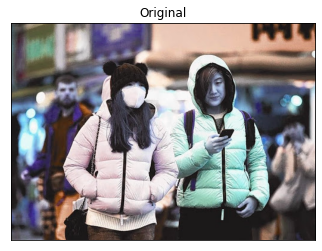

In [6]:
# Displaying an Image
# https://matplotlib.org/3.3.3/tutorials/introductory/images.html

# Showing how important numpy arrays in all of this tooling.
# loading image
img = cv2.imread(test_path)
print(type(img))
# get image properties.
h,w,channel = np.shape(img)
# print image properties.
print(f"width: {w}, height: {h}, and channel: {channel}")
# print pixel value
y = 1
x = 1
print(img[y][x])

# Display one image
def display_one(img, title1 = "Original"):
    plt.imshow(img), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
# Display two images
def display(img1, img2, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(img), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img2), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def display_grid():
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()
    
# Preprocessing
def processing():
    print('Original Size',img.shape)
    # --------------------------------
    # setting dim of the resize
    height = 100
    width = 100
    dim = (width, height)
    res_img = []
    res = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
    res_img.append(res)

    # Checcking the size
    print("Resized", res_img[0].shape)
    
    # Visualizing one of the images in the array
    original = res_img[0]
    display_one(img)

processing()

### Color is off!!!

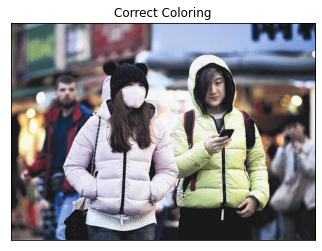

In [7]:
# Yes, because dealing with digital images you have to deal with their specs...
# BRG vs RGB
correct_color = cv2.cvtColor(cv2.imread(test_path), cv2.COLOR_BGR2RGB)
plt.imshow(correct_color), plt.title("Correct Coloring")
plt.xticks([]), plt.yticks([])
plt.show()

## Remove Noise

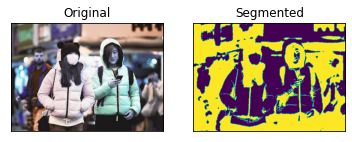

In [8]:
# Segmentation
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Displaying segmented images
display(img, thresh, 'Original', 'Segmented')

# Data Augmentation

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

Data augmentation can expand our dataset by generating more training data from existing training samples. New samples are generated via a number of random transformations that not only yield believable-looking images but also reflect real-life scenarios.



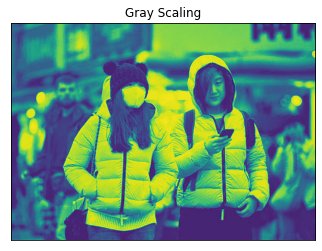

In [9]:
# Gray Scaling
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
display_one(gray, title1 = "Gray Scaling")

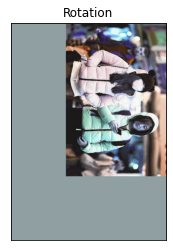

In [10]:
# Rotation
import random

# function for rotation
def rotation(img):
    rows, cols = img.shape[0], img.shape[1]
    randDeg = random.randint(-180, 180)
    matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), randDeg, 0.70)
    rotated = cv2.warpAffine(
        img,
        matrix,
        (rows, cols),
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=(144, 159, 162),
    )
    return rotated


display_one(rotation(img), title1="Rotation")


## Types of Digital Image Access

In short: It's just the usual RGB vs. BGR ordering thing - but, the combination of how you use OpenCV's imencode and imdecode here with this specific image, makes everything totally complicated. ;-)

skimage.data.astronaut() returns a ndarray with RGB ordering, as RGB ordering is the standard in skimage. In contrast, OpenCV internally uses BGR ordering. So, when we would use cv2.imread on a saved PNG of this image, we would get a ndarray with BGR ordering. Also, OpenCV always assumes BGR ordered ndarrays for all its operations.

Now, you use cv2.imencode to generate the byte stream. As mentioned, OpenCV assumes the ndarray fed to that function has BGR ordering. That's important, because the generated byte stream will have RGB ordering (cv2.imencode mimics cv2.imwrite, and OpenCV correctly writes RGB images). So, the created byte stream has a false BGR ordering.

For the decoding, Pillow as well as OpenCV assume a RGB ordered byte stream. So, the ndarray created by the "Pillow way" actually has BGR ordering (which is NOT the Pillow standard) and the ndarray created by OpenCV's imdecode has RGB ordering (which is NOT the OpenCV standard).

Finally, Matplotlib's (or pyplot's) imshow assumes RGB ordered ndarrays for visualization. So, the following will happen:

 - Showing the original ndarray from skimage.data.astronaut() should be correct (RGB ordered).
 - Showing the Pillow loaded PNG should be correct (RGB ordered).
 - Showing the OpenCV loaded PNG should be incorrect (BGR ordered).
 - Showing the Pillow decoded byte stream should be incorrect (BGR ordered).
 - Showing the OpenCV decoded byte stream should be correct (RGB ordered).

Let's see:


In [11]:
# import cv2
# from io import BytesIO
# from matplotlib import pyplot as plt
# import numpy as np
# from PIL import Image
# import skimage


# def bytes_to_ndarray(bytes):
#     bytes_io = bytearray(bytes)
#     img = Image.open(BytesIO(bytes_io))
#     return np.array(img)


# # skimage returns a ndarray with RGB ordering
# img_sk = skimage.data.astronaut()

# # Opening a saved PNG file of this image using Pillow returns a ndarray with RGB ordering
# img_pil = Image.open(test_path)

# # Opening a saved PNG file of this image using OpenCV returns a ndarray with BGR ordering
# img_cv = cv2.imread(test_path, cv2.IMREAD_COLOR)

# # OpenCV uses BGR ordering, thus OpenCV's encoding treats img_sk[:, :, 0] as blue channel,
# # although it's the actual red channel (the same for img_sk[:, :, 2]
# # That means, the encoded byte stream now has BGR ordering!!
# _, bytes = cv2.imencode(".png", img_sk)

# # OpenCV uses BGR ordering, but OpenCV's decoding assumes a RGB ordered byte stream, so
# # the blue and red channels are swapped again here, such that img_cv again is a ndarray with
# # RGB ordering!!
# img_byte_cv = cv2.imdecode(bytes, cv2.IMREAD_ANYCOLOR)

# # Pillow uses RGB ordering, and also assumes a RGB ordered byte stream, but the actual byte
# # stream is BGR ordered, such that img_pil actually is a ndarray with BGR ordering
# img_byte_pil = bytes_to_ndarray(bytes)

# # Matplotlib pyplot imshow uses RGB ordering for visualization!!
# plt.figure(figsize=(8, 12))
# plt.subplot(3, 2, 1), plt.imshow(img_pil), plt.ylabel("PNG loaded with Pillow")
# plt.subplot(3, 2, 2), plt.imshow(img_cv), plt.ylabel("PNG loaded with OpenCV")
# plt.subplot(3, 2, 3), plt.imshow(img_sk), plt.ylabel("Loaded with skimage")
# plt.subplot(3, 2, 5), plt.imshow(img_byte_pil), plt.ylabel("Decoded with Pillow")
# plt.subplot(3, 2, 6), plt.imshow(img_byte_cv), plt.ylabel("Decoded with OpenCV")
# plt.show()


## Importing with CV2 aka OpenCV

> I need things to play nice with Numpy Types.

In [12]:
def crop_img(im, x, y, w, h):
    return im[y : (y + h), x : (x + w), :]


def detect_face(face_path):
    img = cv2.cvtColor(cv2.imread(face_path), cv2.COLOR_BGR2RGB)
    box = detector.detect_faces(img)[0]
    return box


def detect_faces(face_path):
    # img = cv2.cvtColor(cv2.imread(face_path), cv2.COLOR_BGR2RGB)
    img = tf.keras.preprocessing.image.load_img(face_path)
    img = tf.keras.preprocessing.image.img_to_array(img)
    box = detector.detect_faces(img)
    return box


def draw_box(face_path="../data/external/test/maksssksksss0.png", plot=True):

    boxes = detect_faces(face_path)
    im = cv2.cvtColor(cv2.imread(face_path), cv2.COLOR_BGR2RGB)

    if plot:
        # Create figure and axes
        num_box = len(boxes)
        fig, ax = plt.subplots(1, (1 + num_box))
        fig.set_size_inches(4 * (1 + num_box), 4)
        # Display the image
        ax[0].imshow(im)
        ax[0].axis("off")
        # Create a Rectangle patch
        for idx, box in enumerate(boxes):
            box_x, box_y, box_w, box_h = box["box"]
            rect = patches.Rectangle(
                (box_x, box_y),
                box_w,
                box_h,
                linewidth=1,
                edgecolor="r",
                facecolor="none",
            )
            ax[0].add_patch(rect)
            ax[0].text(box_x, box_y, "{:3.2f}".format(box["confidence"]))
            for i in box["keypoints"].keys():
                circle = patches.Circle(box["keypoints"][i], radius=5, color="red")
                ax[0].add_patch(circle)
            ax[1 + idx].imshow(crop_img(im, *box["box"]))
            ax[1 + idx].axis("off")
        plt.show()

    res = [crop_img(im, *box["box"]) for box in boxes]

    return res


In [ ]:
# Test one image
res = draw_box(face_path="../data/processed/train/with_mask/with_mask019.jpg")


In [ ]:
# Test multiple Images
for img in os.listdir(with_mask)[:3]:
    draw_box(with_mask + img)


In [ ]:
from tqdm import tqdm
import shutil
if os.path.exists(test_processed_dir):
    shutil.rmtree(test_processed_dir)
os.mkdir(test_processed_dir)
for img in tqdm(os.listdir(test_dir)):
    box = detect_face(test_dir+img)
    im = plt.imread(test_dir+img)
    cropped = crop_img(im, *box['box'])
    plt.imsave(test_processed_dir+img, crop_img(im, *box['box']))

In [15]:
def cut_negative_boundary(box):
    res = []
    for x in box['box']:
        if x < 0:
            x = 0
        res.append(x)
    box['box'] = res
    return box

In [ ]:
if os.path.exists(train_processed_dir):
    shutil.rmtree(train_processed_dir)
os.mkdir(train_processed_dir)

for img in tqdm(os.listdir(train_dir)):
    try:
        box = detect_face(train_dir+img)
        box = cut_negative_boundary(box)
        im = plt.imread(train_dir+img)
        cropped = crop_img(im, *box['box'])
        plt.imsave(train_processed_dir+img, cropped)
    except:
        print(img)
        continue